# Dimensionality Reduction

**Dimensionality reduction techniques can reduce the number of features in the dataset without having to lose much information and keep /improve the model’s performance**

Benefits of applying dimensionality reduction to a dataset:

•	Space required to store the data is reduced as the number of dimensions comes down.

•	Less dimensions lead to less computation/training time.

•	Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful.

•	It takes care of multicollinearity by removing redundant features.

•	It helps in visualizing data.



### Dimensionality reduction can be done in two different ways:

•	Dimensionality Reduction

•	Feature Selection



#### Dimensionality Reduction Techniques

o	Factor Analysis

o	Uniform Manifold Approximation and Projection (UMAP)


#### Feature Selection
o	ANOVA F-value

o	Exhaustive feature selection (EFS)

o	Random forest


In [31]:
#pip install umap-learn

In [32]:
#!pip install mlxtend --user

# Import the Libraries Required

In [33]:
# Import all libraries
import pandas as pd
#Library for Dimensionality Reduction
from sklearn.decomposition import FactorAnalysis
import umap.umap_ as umap
#Library for Feature Selection using ANOVA F-value (Filter Method)
from sklearn.feature_selection import f_regression
# Library for Feature Selection using Wrapper method 
from mlxtend.feature_selection import ExhaustiveFeatureSelector
# For Feature Selection using Embedded Methods
from sklearn.ensemble import RandomForestRegressor
# Library for regression
from sklearn.linear_model import LinearRegression

# Load the Dataset

In [34]:
auto = pd.read_csv("auto_EDA.csv")
auto

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code,price-OMR
0,122,168.8,64.1,48.8,111,9.03,1,0,1,5263.05
1,122,168.8,64.1,48.8,111,9.03,1,0,1,6435.00
2,122,171.2,65.5,52.4,154,8.17,1,0,1,6435.00
3,164,176.6,66.2,54.3,102,10.32,1,1,0,5440.50
4,164,176.6,66.4,54.3,115,7.74,1,1,0,6805.50
...,...,...,...,...,...,...,...,...,...,...
195,95,188.8,68.9,55.5,114,9.89,1,21,0,6569.55
196,95,188.8,68.8,55.5,160,8.17,1,21,0,7427.55
197,95,188.8,68.9,55.5,134,7.74,1,21,0,8379.15
198,95,188.8,68.9,55.5,106,11.18,0,21,0,8763.30


In [35]:
# missing values
auto.isnull().sum()

normalized-losses    0
length               0
width                0
height               0
horsepower           0
city-kpl             0
fuel_code            0
make_code            0
door_code            0
price-OMR            0
dtype: int64

In [36]:
# check data type
auto.dtypes

normalized-losses      int64
length               float64
width                float64
height               float64
horsepower             int64
city-kpl             float64
fuel_code              int64
make_code              int64
door_code              int64
price-OMR            float64
dtype: object

<AxesSubplot:>

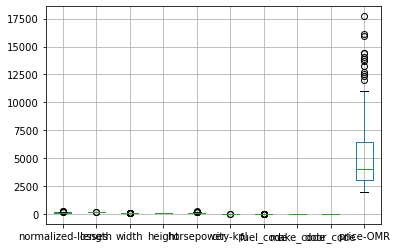

In [37]:
auto.boxplot()

 # Sperating features X and target y

In [38]:
auto

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code,price-OMR
0,122,168.8,64.1,48.8,111,9.03,1,0,1,5263.05
1,122,168.8,64.1,48.8,111,9.03,1,0,1,6435.00
2,122,171.2,65.5,52.4,154,8.17,1,0,1,6435.00
3,164,176.6,66.2,54.3,102,10.32,1,1,0,5440.50
4,164,176.6,66.4,54.3,115,7.74,1,1,0,6805.50
...,...,...,...,...,...,...,...,...,...,...
195,95,188.8,68.9,55.5,114,9.89,1,21,0,6569.55
196,95,188.8,68.8,55.5,160,8.17,1,21,0,7427.55
197,95,188.8,68.9,55.5,134,7.74,1,21,0,8379.15
198,95,188.8,68.9,55.5,106,11.18,0,21,0,8763.30


In [39]:
X = auto.iloc[:,:-1]
X

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code
0,122,168.8,64.1,48.8,111,9.03,1,0,1
1,122,168.8,64.1,48.8,111,9.03,1,0,1
2,122,171.2,65.5,52.4,154,8.17,1,0,1
3,164,176.6,66.2,54.3,102,10.32,1,1,0
4,164,176.6,66.4,54.3,115,7.74,1,1,0
...,...,...,...,...,...,...,...,...,...
195,95,188.8,68.9,55.5,114,9.89,1,21,0
196,95,188.8,68.8,55.5,160,8.17,1,21,0
197,95,188.8,68.9,55.5,134,7.74,1,21,0
198,95,188.8,68.9,55.5,106,11.18,0,21,0


In [40]:
#auto['price-OMR']
y = auto.iloc[:,-1]
y

0      5263.05
1      6435.00
2      6435.00
3      5440.50
4      6805.50
        ...   
195    6569.55
196    7427.55
197    8379.15
198    8763.30
199    8823.75
Name: price-OMR, Length: 200, dtype: float64

# Dimensionality Reduction

## Factor Analysis

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). However, these factors are difficult to observe.


In [41]:
X.corr()

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code
normalized-losses,1.000000,0.019688,0.088519,-0.374913,0.218297,-0.226179,0.101574,-0.254534,0.362045
length,0.019688,1.000000,0.852930,0.487184,0.573091,-0.660876,-0.218016,0.118248,-0.391109
width,0.088519,0.852930,1.000000,0.297166,0.609636,-0.629050,-0.253959,0.002260,-0.220348
height,-0.374913,0.487184,0.297166,1.000000,-0.094588,-0.042130,-0.284410,0.234614,-0.536226
horsepower,0.218297,0.573091,0.609636,-0.094588,1.000000,-0.819382,0.166734,-0.062591,0.109228
city-kpl,-0.226179,-0.660876,-0.629050,-0.042130,-0.819382,1.000000,-0.264729,0.062337,0.021573
fuel_code,0.101574,-0.218016,-0.253959,-0.284410,0.166734,-0.264729,1.000000,-0.108557,0.188523
make_code,-0.254534,0.118248,0.002260,0.234614,-0.062591,0.062337,-0.108557,1.000000,-0.148841
door_code,0.362045,-0.391109,-0.220348,-0.536226,0.109228,0.021573,0.188523,-0.148841,1.000000


In [42]:
# Compute covariance matrix, 
# then compute Eigen values and Eigen Vectors


In [43]:
fa = FactorAnalysis(n_components=3)

In [44]:
fa.fit_transform(X)

array([[ 1.68433937e-01, -9.41095032e-02, -7.57913472e-01],
       [ 1.68433937e-01, -9.41095032e-02, -7.57913472e-01],
       [ 1.15440443e+00, -7.06504461e-01, -1.34559039e+00],
       [ 4.35425047e-01,  1.26909993e+00,  4.94361102e-01],
       [ 7.33305810e-01,  1.08553351e+00,  2.44839276e-01],
       [ 1.69183705e-01, -1.06007934e-01,  1.57016373e-01],
       [ 5.99365837e-01,  9.28973681e-01,  1.95541131e+00],
       [ 2.11650311e-01, -1.52475371e-01,  1.77326552e+00],
       [ 1.28267968e+00,  5.07490681e-01,  1.34724203e+00],
       [ 7.14417168e-01,  2.12559856e+00,  6.20995336e-01],
       [ 7.13951068e-01,  2.12438644e+00,  6.50112830e-01],
       [ 1.12710502e+00,  1.72438621e+00,  1.95503210e-01],
       [ 1.12663891e+00,  1.72317410e+00,  2.24620703e-01],
       [ 4.48729105e-01, -2.94073973e-01,  1.10541855e+00],
       [ 1.83815939e+00, -1.15094122e+00, -1.35029686e-01],
       [ 1.85187238e+00, -1.16252072e+00,  2.93229637e-01],
       [ 1.86190585e+00, -1.17519293e+00

In [45]:
X_fa= pd.DataFrame(fa.fit_transform(X),columns=['f1','f2','f3'])
X_fa

,f1,f2,f3
0,0.168434,-0.094110,-0.757913
1,0.168434,-0.094110,-0.757913
2,1.154404,-0.706504,-1.345590
3,0.435425,1.269100,0.494361
4,0.733306,1.085534,0.244839
...,...,...,...
195,-0.001551,-1.007908,1.133541
196,1.046448,-1.654167,0.198198
197,0.455159,-1.289444,0.734608
198,-0.185016,-0.895219,1.317455


In [46]:
fa1 = FactorAnalysis(n_components=4)

In [47]:
fa1.fit_transform(X)

array([[ 1.63695301e-01, -6.50600173e-02,  9.12888437e-01,
        -1.83986482e+00],
       [ 1.63695301e-01, -6.50600173e-02,  9.12888437e-01,
        -1.83986482e+00],
       [ 1.13527403e+00, -6.73449840e-01,  1.53756076e+00,
        -1.67982039e+00],
       [ 4.56946065e-01,  1.27190646e+00, -3.57136519e-01,
        -1.62841582e+00],
       [ 7.49292746e-01,  1.09078612e+00, -9.67548906e-02,
        -1.56565324e+00],
       [ 1.77249272e-01, -9.30070276e-02,  1.33619380e-02,
        -1.90520061e+00],
       [ 6.40343506e-01,  9.07449875e-01, -1.76602319e+00,
        -2.05986301e+00],
       [ 2.43153735e-01, -1.65481449e-01, -1.54842124e+00,
        -2.32141830e+00],
       [ 1.31105299e+00,  4.91571583e-01, -1.14661203e+00,
        -1.90048809e+00],
       [ 7.43464742e-01,  2.11968481e+00, -5.48365931e-01,
        -1.25445788e+00],
       [ 7.43034143e-01,  2.11852482e+00, -5.66063723e-01,
        -1.26169007e+00],
       [ 1.14668695e+00,  1.72315609e+00, -1.11294789e-01,
      

## Uniform Manifold Approximation and Projection (UMAP)

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that use graph layout algorithm to arrange data in low dimension.


In [48]:
um = umap.UMAP(n_components=4)

In [49]:
X_umap = um.fit_transform(X)
X_umap

array([[ 4.7138457 ,  5.5023828 ,  3.5168312 ,  6.377883  ],
       [ 4.7545676 ,  5.526925  ,  3.4859905 ,  6.3884177 ],
       [-1.3769251 ,  8.959443  ,  4.5213337 ,  8.0946245 ],
       [-2.363848  ,  8.316753  ,  6.7923093 , 10.428072  ],
       [-2.1385462 ,  8.359599  ,  6.642471  , 10.281304  ],
       [ 4.7811346 ,  5.5524683 ,  3.4034338 ,  6.4617634 ],
       [-1.9589938 ,  8.455512  ,  6.8142486 , 10.498144  ],
       [ 5.2758718 ,  5.5792165 ,  3.4046676 ,  6.3552074 ],
       [-1.8336346 ,  8.889103  ,  5.237591  ,  8.884328  ],
       [-2.273266  ,  8.673166  ,  6.37553   , 10.123588  ],
       [-2.1976757 ,  8.68795   ,  6.422555  , 10.176019  ],
       [-2.1616518 ,  8.581919  ,  6.2527204 ,  9.96976   ],
       [-2.1381314 ,  8.539805  ,  6.238379  ,  9.946452  ],
       [ 4.579541  ,  5.4834027 ,  3.3630836 ,  6.4871707 ],
       [-1.8816631 , 10.287143  ,  4.7457566 ,  7.4048915 ],
       [-2.0250905 , 10.387469  ,  4.7917876 ,  7.4548144 ],
       [-2.003367  , 10.

# Feature Selection

The process of choosing a subset of input features that contribute the most to the output feature for use in model construction. 


## ANOVA F-value

▪	ANOVA F-value method estimates the degree of linearity between the input feature (i.e., predictor) and the output variable. 

▪	A high F-value indicates high degree of linearity and a low F-value indicates low degree of linearity. 


**Scikit-learn has two functions to calculate F-value:**

•	f_classif, which calculate F-value between input and output feature for classification task

•	f_regression, which calculate F-value between input and output feature for regression task


In [50]:
X.sample()

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code
48,104,159.1,64.2,54.1,68,13.33,1,8,1


In [51]:
f_regression(X,y)

(array([3.75406068e+00, 1.71310663e+02, 2.42300476e+02, 3.05320190e+00,
        3.78569981e+02, 1.73253305e+02, 2.73940397e+00, 5.17382239e+00,
        1.98039405e-01]),
 array([5.41019336e-02, 1.30451434e-28, 3.30892661e-36, 8.21284943e-02,
        7.74081504e-48, 7.73743985e-29, 9.94854466e-02, 2.40014603e-02,
        6.56794166e-01]))

In [52]:
f_regression(X,y)[0]

array([3.75406068e+00, 1.71310663e+02, 2.42300476e+02, 3.05320190e+00,
       3.78569981e+02, 1.73253305e+02, 2.73940397e+00, 5.17382239e+00,
       1.98039405e-01])

In [53]:
X.columns

Index(['normalized-losses', 'length', 'width', 'height', 'horsepower',
       'city-kpl', 'fuel_code', 'make_code', 'door_code'],
      dtype='object')

In [54]:
fdf = pd.DataFrame({"Features":X.columns,"F Score":f_regression(X,y)[0]})
fdf

,Features,F Score
0,normalized-losses,3.754061
1,length,171.310663
2,width,242.300476
3,height,3.053202
4,horsepower,378.569981
5,city-kpl,173.253305
6,fuel_code,2.739404
7,make_code,5.173822
8,door_code,0.198039


In [55]:
fdf.sort_values("F Score",ascending=False)

,Features,F Score
4,horsepower,378.569981
2,width,242.300476
5,city-kpl,173.253305
1,length,171.310663
7,make_code,5.173822
0,normalized-losses,3.754061
3,height,3.053202
6,fuel_code,2.739404
8,door_code,0.198039


In [56]:
fdf.loc[fdf['F Score'] > 170,'Features']

1        length
2         width
4    horsepower
5      city-kpl
Name: Features, dtype: object

In [57]:
X_fscore = X[fdf.loc[fdf['F Score'] > 170,'Features']]
X_fscore

,length,width,horsepower,city-kpl
0,168.8,64.1,111,9.03
1,168.8,64.1,111,9.03
2,171.2,65.5,154,8.17
3,176.6,66.2,102,10.32
4,176.6,66.4,115,7.74
...,...,...,...,...
195,188.8,68.9,114,9.89
196,188.8,68.8,160,8.17
197,188.8,68.9,134,7.74
198,188.8,68.9,106,11.18


## Exhaustive feature selection (EFS)

▪	EFS finds the best subset of features by evaluating all feature combinations.

▪	EFS selects a subset that generates the best performance (e.g., accuracy, error etc..) of the model being considered.

▪	Mlxtend provides ExhaustiveFeatureSelector function to perform EFS.


In [66]:
auto.sample()

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code,price-OMR
34,110,163.4,64.0,54.5,76,12.9,1,5,0,2845.05


In [69]:
y

0      5263.05
1      6435.00
2      6435.00
3      5440.50
4      6805.50
        ...   
195    6569.55
196    7427.55
197    8379.15
198    8763.30
199    8823.75
Name: price-OMR, Length: 200, dtype: float64

In [65]:
lr = LinearRegression()

In [72]:
efs = ExhaustiveFeatureSelector(estimator=lr,
                         max_features=7,
                         scoring="r2")

In [73]:
efs.fit(X,y)

Features: 501/501

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8]],
                          max_features=7, scoring='r2')

In [74]:
efs.best_feature_names_

('normalized-losses', 'width', 'horsepower', 'fuel_code', 'make_code')

In [75]:
X.sample()

,normalized-losses,length,width,height,horsepower,city-kpl,fuel_code,make_code,door_code
92,122,165.3,63.8,54.5,69,13.33,1,12,0


In [77]:
#X[['normalized-losses', 'width', 'horsepower', 'fuel_code', 'make_code']]

,normalized-losses,width,horsepower,fuel_code,make_code
0,122,64.1,111,1,0
1,122,64.1,111,1,0
2,122,65.5,154,1,0
3,164,66.2,102,1,1
4,164,66.4,115,1,1
...,...,...,...,...,...
195,95,68.9,114,1,21
196,95,68.8,160,1,21
197,95,68.9,134,1,21
198,95,68.9,106,0,21


In [79]:
list(efs.best_feature_names_)

['normalized-losses', 'width', 'horsepower', 'fuel_code', 'make_code']

In [81]:
X_efs = X[list(efs.best_feature_names_)]
X_efs

,normalized-losses,width,horsepower,fuel_code,make_code
0,122,64.1,111,1,0
1,122,64.1,111,1,0
2,122,65.5,154,1,0
3,164,66.2,102,1,1
4,164,66.4,115,1,1
...,...,...,...,...,...
195,95,68.9,114,1,21
196,95,68.8,160,1,21
197,95,68.9,134,1,21
198,95,68.9,106,0,21


In [ ]:
# save all the rows and only features(cols) selected by EFS alg
X_efs = 

## Random Forest Feature Selection Method

▪	Random forest is one of the most popular learning algorithms used for feature selection in a data science workflow.

▪	Use gini criterion to define feature importance


In [58]:
rf = RandomForestRegressor()

In [59]:
rf.fit(X,y)

RandomForestRegressor()

In [60]:
rf.feature_importances_

array([0.02055533, 0.08263838, 0.14710459, 0.01641837, 0.5766067 ,
       0.13874131, 0.00270399, 0.01367572, 0.00155561])

In [61]:
rdf = pd.DataFrame({"Features":X.columns,"RF Score":rf.feature_importances_})
rdf

,Features,RF Score
0,normalized-losses,0.020555
1,length,0.082638
2,width,0.147105
3,height,0.016418
4,horsepower,0.576607
5,city-kpl,0.138741
6,fuel_code,0.002704
7,make_code,0.013676
8,door_code,0.001556


In [62]:
rdf.sort_values('RF Score',ascending=False)

,Features,RF Score
4,horsepower,0.576607
2,width,0.147105
5,city-kpl,0.138741
1,length,0.082638
0,normalized-losses,0.020555
3,height,0.016418
7,make_code,0.013676
6,fuel_code,0.002704
8,door_code,0.001556


In [63]:
rdf.loc[rdf['RF Score'] > 0.1,"Features"]

2         width
4    horsepower
5      city-kpl
Name: Features, dtype: object

In [64]:
X_rf = X[rdf.loc[rdf['RF Score'] > 0.1,"Features"]]
X_rf

,width,horsepower,city-kpl
0,64.1,111,9.03
1,64.1,111,9.03
2,65.5,154,8.17
3,66.2,102,10.32
4,66.4,115,7.74
...,...,...,...
195,68.9,114,9.89
196,68.8,160,8.17
197,68.9,134,7.74
198,68.9,106,11.18


In [ ]:
# 6 different X sets are there(X,X_fa,X_um,X_fsc,X_efs,X_rf)
# which to be selected?
# Trial and error
# X_final = best(X,X_fa,X_um,X_fsc,X_efs,X_rf) giving high accuracy
